# MLE

<a href="#Capture-recapture-method">Capture recapture method</a>

<a href="#Estimation-of-mu-and-sigma-(Normal-Distribution)">Estimation of mu and sigma (Normal Distribution)</a>

<a href="#Estimation-of-mu-(Bernoulli-Distribution)">Estimation of mu (Bernoulli Distribution)</a> 

<a href="#Square-cost-function">Square cost function</a>

<a href="#Cross-entropy-cost-function">Cross entropy cost function</a>

CS231n_2017 [pdf](http://localhost:8888/notebooks/Dropbox/Paper/cs231n_2017_lecture3.pdf)

# Capture recapture method

In [1]:
%matplotlib inline

<div align="center"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Jackdaw_with_a_ring.JPG/440px-Jackdaw_with_a_ring.JPG" width="50%"></div>

$$
P(t|n,c,r) = \frac{{c\choose t}{n-c\choose r-t}}{{n\choose r}} 
$$

In [4]:
print(dir(list))

['__add__', '__class__', '__contains__', '__delattr__', '__delitem__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__iadd__', '__imul__', '__init__', '__iter__', '__le__', '__len__', '__lt__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__rmul__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', 'append', 'clear', 'copy', 'count', 'extend', 'index', 'insert', 'pop', 'remove', 'reverse', 'sort']


Number of blue jeys in the forest: 33


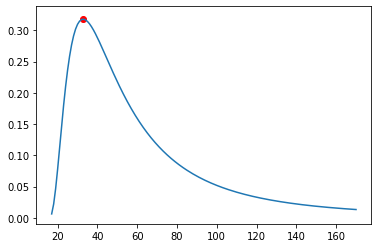

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as ss

    
def capture_recapture(c, r, t):
    # n - Number of blue jeys in the forest, unknown
    # c - Number of blue jeys captured, tagged, and release
    # r - Number of blue jeys re-captured 
    # t - Number of blue jeys tagged in re-captured stage
    
    prob = []
    for n in range((c+r-t), 10*(c+r-t) + 1):
        prob_temp = ss.comb(c,t) * ss.comb(n-c,r-t) / ss.comb(n,r) 
        prob.append(prob_temp)

    # mle
    ind = prob.index(max(prob))
    n_mle = ind+(c+r-t)
    print('Number of blue jeys in the forest: {}'.format(n_mle))

    plt.plot(range((c+r-t), 10*(c+r-t) + 1), prob)
    plt.scatter(n_mle, prob[ind], color='red')
    plt.show()
        
    
if __name__ == '__main__':
           # n - Number of blue jeys in the forest, unknown
    c = 10 # c - Number of blue jeys captured, tagged, and release
    r = 10 # r - Number of blue jeys re-captured 
    t = 3  # t - Number of blue jeys tagged in re-captured stage
    
    capture_recapture(c, r, t)

[<a href="#MLE">Back to top</a>]

# Estimation of mu and sigma (Normal Distribution) 

Let $x^{(i)}$ be $m$ iid sample from $N(\mu,\sigma^2)$.
Then, $\mu$ and $\sigma^2$ can be estimated by $\hat{\mu}$ and $\hat{\sigma}^2$
where 
$$\begin{array}{lll}
\hat{\mu}&=&\frac{\sum_{i=1}^mx^{(i)}}{m}\\
\hat{\sigma}^2&=&\frac{\sum_{i=1}^m(x^{(i)}-\hat{\mu})^2}{m}
\end{array}$$

##### Data
$$\{x^{(i)}: i=1,\ldots,m\}$$

##### Model
$$x^{(i)}\sim N(\mu,\sigma^2)$$

##### Likelihood function
$$L(\mu,\sigma^2)=\prod_{i=1}^m\frac{1}{\sqrt{2\pi\sigma^2}}exp\left(-\frac{1}{2\sigma^2}\left(x^{(i)}-\mu\right)^2\right)$$

##### Log-Likelihood function
$$l(\mu,\sigma^2)=-\frac{1}{2\sigma^2}\sum_{i=1}^m\left(x^{(i)}-\mu\right)^2-\frac{m}{2}\log\sigma^2+\mbox{Constant}$$

##### Cost function
$$J(\mu,\sigma^2)=\frac{1}{2\sigma^2}\sum_{i=1}^m\left(x^{(i)}-\mu\right)^2+\frac{m}{2}\log\sigma^2$$

##### Maximum likelihood principle
$$\mbox{argmax}_{\mu,\sigma^2}\ L\quad\Leftrightarrow\quad\mbox{argmax}_{\mu,\sigma^2}\ l\quad\Leftrightarrow\quad\mbox{argmin}_{\mu,\sigma^2}\ J$$

$$\begin{array}{llcll}
\frac{\partial J}{\partial\mu}=0
&\Rightarrow&
\sum_{i=1}^m\left(x^{(i)}-\mu\right)=0
&\Rightarrow&
\hat{\mu}=\frac{\sum_{i=1}^mx^{(i)}}{m}\\
\frac{\partial J}{\partial\sigma^2}=0
&\Rightarrow&
\cdots
&\Rightarrow&
\hat{\sigma}^2=\frac{\sum_{i=1}^m(x^{(i)}-\hat{\mu})^2}{m}\\
\end{array}$$

[<a href="#MLE">Back to top</a>]

# Estimation of mu (Bernoulli Distribution) 

Let $x^{(i)}$ be $m$ iid sample from $B(p)$.
Then, $p$ can be estimated by $\hat{p}$
where 
$$\begin{array}{lll}
\hat{p}&=&\frac{\sum_{i=1}^mx^{(i)}}{m}
\end{array}$$

##### Data
$$\{x^{(i)}: i=1,\ldots,m\}$$

##### Model
$$x^{(i)}\sim B(p)$$

##### Likelihood function
$$L(p)=\prod_{i=1}^mp^{x^{(i)}}(1-p)^{1-x^{(i)}}$$

##### Log-Likelihood function
$$l(p)=\sum_{i=1}^mx^{(i)}\log(p)+(1-x^{(i)})\log(1-p)$$

##### Cost function
$$J(p)=-\sum_{i=1}^mx^{(i)}\log(p)+(1-x^{(i)})\log(1-p)$$

##### Maximum likelihood principle
$$\mbox{argmax}_{p}\ L\quad\Leftrightarrow\quad\mbox{argmax}_{p}\ l\quad\Leftrightarrow\quad\mbox{argmin}_{p}\ J$$

$$\begin{array}{llcll}
\frac{\partial J}{\partial p}=0
&\Rightarrow&
\sum_{i=1}^m\frac{x^{(i)}}{p}-\frac{1-x^{(i)}}{1-p}=0
&\Rightarrow&
\hat{p}=\frac{\sum_{i=1}^mx^{(i)}}{m}
\end{array}$$

[<a href="#MLE">Back to top</a>]

# Square cost function

##### Data
$$\{(x^{(i)}, y^{(i)}): i=1,\ldots,m\}$$

##### Model
$$y^{(i)}=\alpha+\beta x^{(i)}+\varepsilon^{(i)}$$
where with a fixed $\sigma^2$
$$\varepsilon^{(i)}\sim N(0,\sigma^2)$$

##### Likelihood function
$$L(\alpha,\beta)=\prod_{i=1}^m\frac{1}{\sqrt{2\pi\sigma^2}}exp\left(-\frac{1}{2\sigma^2}\left(y^{(i)}-\alpha-\beta x^{(i)}\right)^2\right)$$

##### Log-Likelihood function
$$l(\alpha,\beta)=-\frac{1}{2\sigma^2}\sum_{i=1}^m\left(y^{(i)}-\alpha-\beta x^{(i)}\right)^2+\mbox{Constant}$$

##### Cost function
$$J(\alpha,\beta)=\frac{1}{2}\sum_{i=1}^m\left(y^{(i)}-\alpha-\beta x^{(i)}\right)^2$$

##### Maximum likelihood principle
$$\mbox{argmax}_{\alpha,\beta}\ L\quad\Leftrightarrow\quad\mbox{argmax}_{\alpha,\beta}\ l\quad\Leftrightarrow\quad\mbox{argmin}_{\alpha,\beta}\ J$$

In [1]:
import tensorflow as tf

y_minus_y_hat = tf.constant([[1.2], [0.1], [0.3]])

loss = tf.nn.l2_loss(y_minus_y_hat)
loss2 = tf.reduce_sum(tf.square(y_minus_y_hat)) / 2
loss3 = (1.2**2 + 0.1**2 + 0.3**2) / 2 

with tf.Session() as sess:
    print("y_minus_y_hat : ")
    print(sess.run(y_minus_y_hat))
    print()
    
    print("loss  : ", sess.run(loss))
    print("loss2 : ", sess.run(loss2))
    print("loss3 : ", loss3)

y_minus_y_hat : 
[[1.2]
 [0.1]
 [0.3]]

loss  :  0.77000004
loss2 :  0.77000004
loss3 :  0.77


[<a href="#MLE">Back to top</a>]

# Cross entropy cost function

##### Data
$$\{(x^{(i)}, y^{(i)}): i=1,\ldots,m\}$$

##### Model
$$
\begin{array}{lll}
p^{(i)}
&=&\mbox{softmax}(x^{(i)}W+b)\\
&=&e^{x^{(i)}W+b} / \mbox{np.sum}(e^{x^{(i)}W+b})
\end{array}
$$

##### Likelihood function
$$L(W,b)=\prod_{i=1}^m\prod_{k=0}^{9}\left(p^{(i)}[k]\right)^{y^{(i)}[k]}$$

##### Log-Likelihood function
$$l(W,b)=\sum_{i=1}^m\sum_{k=0}^{9} y^{(i)}[k]\log p^{(i)}[k]$$

##### Cost function
$$J(W,b)=-\frac{1}{m}\sum_{i=1}^m\sum_{k=0}^{9} y^{(i)}[k]\log p^{(i)}[k]$$

##### Maximum likelihood principle
$$\mbox{argmax}_{W,b}\ L\quad\Leftrightarrow\quad\mbox{argmax}_{W,b}\ l\quad\Leftrightarrow\quad\mbox{argmin}_{W,b}\ J$$

In [2]:
import tensorflow as tf

logits = tf.constant([[0.0, -0.1, 1.2], [0.0, 0.1, -1.2]])
y_true = tf.constant([[0.0,  0.0, 1.0], [0.0, 1.0,  0.0]]) 

probs = tf.nn.softmax(logits)
probs2 = tf.exp(logits) / tf.reshape(tf.reduce_sum(tf.exp(logits), axis=1), shape=(2,1))

cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,
                                                           labels=y_true)
cross_entropy2 = - tf.reduce_sum(y_true * tf.log(probs), axis=1)

loss = tf.reduce_mean(cross_entropy)

with tf.Session() as sess:
    print("logits : ")
    print(sess.run(logits))
    print()
    
    print("probs  : ")
    print(sess.run(probs))
    print()
    
    print("probs2 : ")
    print(sess.run(probs2))
    print()
    
    print("cross_entropy  : ", sess.run(cross_entropy))
    print("cross_entropy2 : ", sess.run(cross_entropy2))
    print()
    
    print("loss  : ", sess.run(loss))

logits : 
[[ 0.  -0.1  1.2]
 [ 0.   0.1 -1.2]]

probs  : 
[[0.19138922 0.17317612 0.6354346 ]
 [0.41556454 0.45926985 0.12516563]]

probs2 : 
[[0.19138922 0.17317614 0.6354346 ]
 [0.41556454 0.45926985 0.12516563]]

cross_entropy  :  [0.45344603 0.7781173 ]
cross_entropy2 :  [0.45344606 0.77811736]

loss  :  0.61578166


[<a href="#MLE">Back to top</a>]